# Feature engineering

So far we have only used closing price and relative differences as features, which has limited the performance of the model. In this regard, we have further investigated different metrics and indicators used in the literature to improve the features used in the model.

Based on the work of Patel and Won, we summarize and apply three basic financial indicators: 
- Simple n-day moving average 
- 10-day weighted moving average
- Momentum

Alongside with the full vector of raw information:
- O: Opening price of the day.
- C: Closing price of the day.
- H: Highest price during the day.
- L: Lowest price during the day.

References:
- Jigar Patel, Sahil Shah, Priyank Thakkar, K Kotecha, Predicting stock market index using fusion of machine learning techniques,
Expert Systems with Applications, Volume 42, Issue 4, 2015, Pages 2162-2172, ISSN 0957-4174, https://doi.org/10.1016/j.eswa.2014.10.031.
- Jae Won Lee, "Stock price prediction using reinforcement learning," ISIE 2001. 2001 IEEE International Symposium on Industrial Electronics Proceedings (Cat. No.01TH8570), Pusan, South Korea, 2001, pp. 690-695 vol.1, doi: 10.1109/ISIE.2001.931880.


In [1]:
cd ~/downloads/Pedro-Pineapple

/home/aargaez/downloads/Pedro-Pineapple


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.dates import DayLocator

In [3]:
data = pd.read_csv('experiments/SPY_data.csv')
data.columns = data.columns.str.lower()

In [4]:
data.head(10)

,date,open,high,low,close,adj close,volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629639,91366500
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823273,78744400
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662949,78379000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384445,71559900
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716431,46939700
5,2017-01-10,226.479996,227.449997,226.009995,226.460007,201.716431,63771900
6,2017-01-11,226.360001,227.100006,225.589996,227.100006,202.286438,74650000
7,2017-01-12,226.500000,226.750000,224.960007,226.529999,201.778732,72113200
8,2017-01-13,226.729996,227.399994,226.690002,227.050003,202.241882,62717900
9,2017-01-17,226.309998,226.779999,225.800003,226.250000,201.529343,61240800


In [5]:
# TODO: Add class for pipeline-like feature constructions.

def n_rolling_mean(
    x_: pd.Series, n: int
) -> pd.Series:
    """
    Calculated the N day rolling mean.
    """
    return x_.rolling(window=n).mean().fillna(0)

def weighted_n_moving_avg(
    x_: pd.Series, n: int    
) -> pd.Series:
    """
    Calculates the N day weighted rolling mean.
    """
    weights = np.arange(1, n + 1)
    wma = x_.rolling(window=n).apply(
        lambda x: np.dot(x, weights) / weights.sum(),
        raw=True
    ).fillna(0)
    return wma

def momentum(x_: pd.Series, n: int) -> pd.Series:
    """
    Calculates the n day momentum    
    """
    hare = np.arange(n, len(x_))
    # Momentum.
    m = [0] * n
    for i in hare:
        m.append(
            x_[i] - x_[i - n]
        )
    return pd.Series(m)

In [6]:
# Features.
# 10-day day rolling mean.
data['n10_rolling_mean'] = n_rolling_mean(x_=data['close'], n=10)
# 10-day day weighted  rolling mean.
data['n10_weighted_rolling_mean'] = n_rolling_mean(x_=data['close'], n=10)
# Momentum.
data['momentum'] = momentum(x_=data['close'], n=10)

In [7]:
data

,date,open,high,low,close,adj close,volume,n10_rolling_mean,n10_weighted_rolling_mean,momentum
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629639,91366500,0.000000,0.000000,0.000000
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823273,78744400,0.000000,0.000000,0.000000
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662949,78379000,0.000000,0.000000,0.000000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384445,71559900,0.000000,0.000000,0.000000
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716431,46939700,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1713,2023-10-24,422.649994,424.820007,420.739990,423.630005,423.630005,78564200,429.545999,429.545999,-10.910004
1714,2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200,427.668997,427.668997,-18.770020
1715,2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800,425.557996,425.557996,-21.110016
1716,2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107228400,423.475995,423.475995,-20.820007


## EDA on features

In [8]:
x_spacing = 30
x_rotation = 45

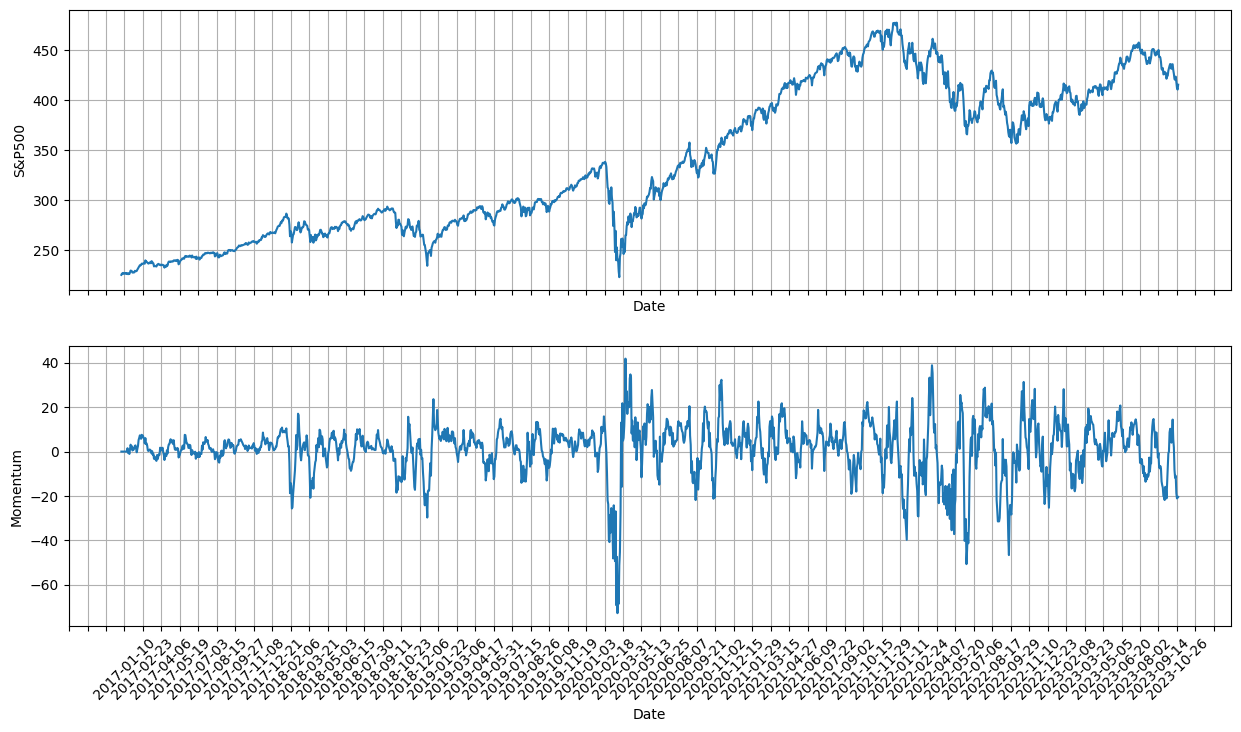

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(15, 8))

ax1.plot(data['date'], data['close'])
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P500')
ax1.xaxis.set_major_locator(DayLocator(interval=x_spacing))
ax1.tick_params(axis='x', rotation=x_rotation)
ax1.grid()


ax2.plot(data['date'], data['momentum'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Momentum')
ax2.tick_params(axis='x', rotation=x_rotation)
ax2.xaxis.set_major_locator(DayLocator(interval=x_spacing))
ax2.grid()


In [10]:
# MCT.
data['momentum'].describe()

count    1718.000000
mean        1.134476
std        11.797836
min       -72.859985
25%        -3.047523
50%         2.485008
75%         7.380005
max        41.909988
Name: momentum, dtype: float64

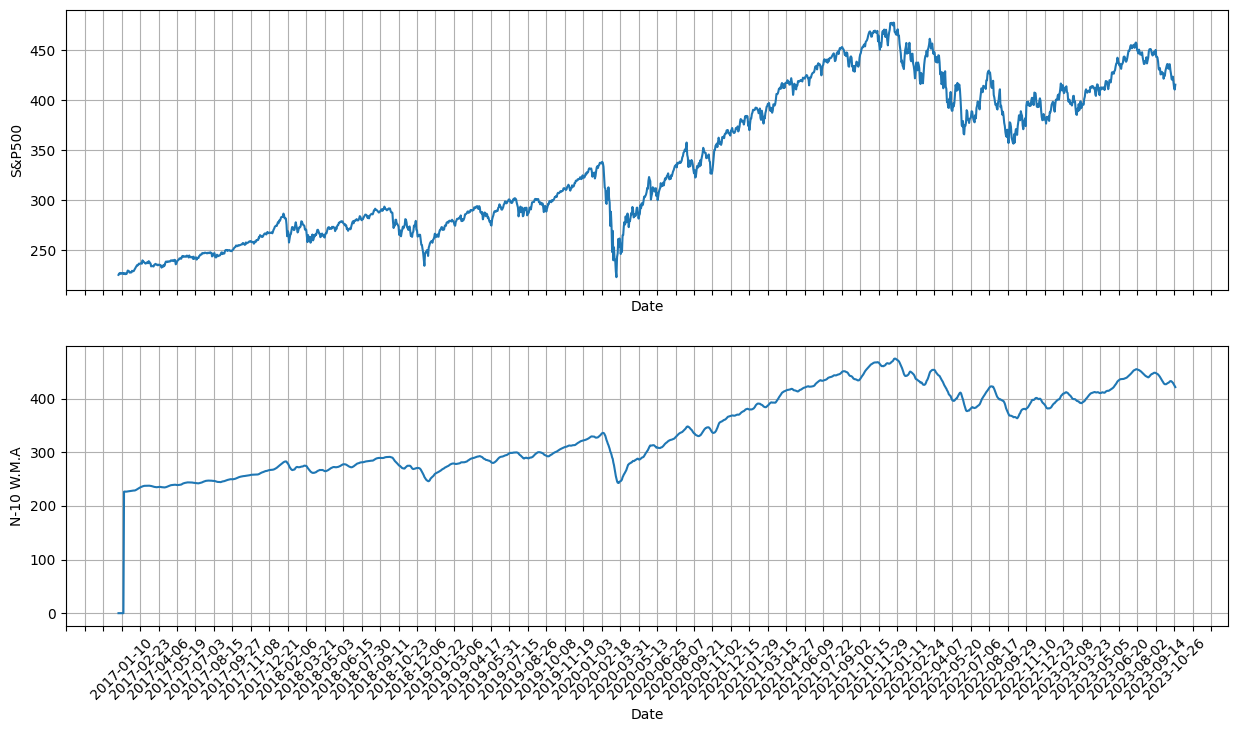

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(15, 8))

ax1.plot(data['date'], data['close'])
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P500')
ax1.xaxis.set_major_locator(DayLocator(interval=x_spacing))
ax1.tick_params(axis='x', rotation=x_rotation)
ax1.grid()


ax2.plot(data['date'], data['n10_weighted_rolling_mean'])
ax2.set_xlabel('Date')
ax2.set_ylabel('N-10 W.M.A')
ax2.tick_params(axis='x', rotation=x_rotation)
ax2.xaxis.set_major_locator(DayLocator(interval=x_spacing))
ax2.grid()


In [13]:
# MCT
data['n10_weighted_rolling_mean'].describe()

count    1718.000000
mean      337.468199
std        77.412836
min         0.000000
25%       273.409003
50%       322.314003
75%       410.362247
max       474.491000
Name: n10_weighted_rolling_mean, dtype: float64

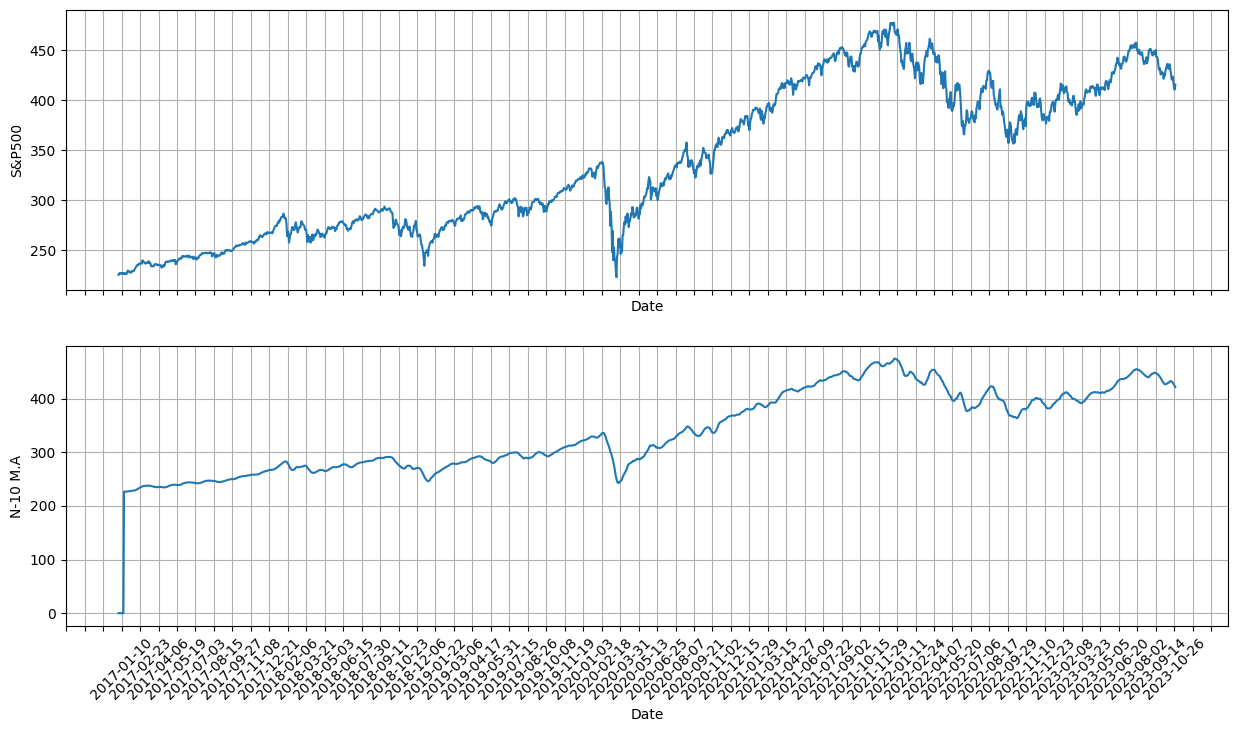

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(15, 8))

ax1.plot(data['date'], data['close'])
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P500')
ax1.xaxis.set_major_locator(DayLocator(interval=x_spacing))
ax1.tick_params(axis='x', rotation=x_rotation)
ax1.grid()


ax2.plot(data['date'], data['n10_rolling_mean'])
ax2.set_xlabel('Date')
ax2.set_ylabel('N-10 M.A')
ax2.tick_params(axis='x', rotation=x_rotation)
ax2.xaxis.set_major_locator(DayLocator(interval=x_spacing))
ax2.grid()

In [15]:
# MCT
data['n10_rolling_mean'].describe()

count    1718.000000
mean      337.468199
std        77.412836
min         0.000000
25%       273.409003
50%       322.314003
75%       410.362247
max       474.491000
Name: n10_rolling_mean, dtype: float64